<a href="https://colab.research.google.com/github/hoangducdungvn/AIO-Excersice/blob/main/M05W01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import builtins

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)

In [ ]:
dataset_arr = df.to_numpy().astype(np.float64)
X,y = dataset_arr[:, :-1], dataset_arr[:,-1]

In [ ]:
intercept = np.ones((
    X.shape[0],1)
)
X_b = np.concatenate((intercept, X), axis=1)

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [ ]:
# ham sigmoid
def sigmoid(z):
  return 1/ (1+np.exp(-z))

In [ ]:
def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(dot_product)

  return y_hat

In [ ]:
def compute_loss(y_hat,y):
  y_hat = np.clip(
      y_hat,
      1e-7,
      1-1e-7
  )

  return (
      -y * \
      np.log(y_hat) - (1-y) * \
      np.log(1-y_hat)
  ).mean()

In [ ]:
def compute_gradient(X, y, y_hat):
  return np.dot(
      X.T, (y_hat-y)
  ) / y.size

In [ ]:
def update_theta(theta, gradient, lr):
  return theta - lr * gradient

In [ ]:
def compute_accuracy(X,y,theta):
  y_hat = predict(X, theta).round()
  acc = (y_hat == y).mean()

  return acc

In [ ]:
# khai bao cac sieu tham so va khoi tao weight
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape[1])

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)

    gradient = compute_gradient(X_i, y_i, y_hat)

    theta = update_theta(theta, gradient, lr)

    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = builtins.sum(train_batch_losses) / len(train_batch_losses)

  val_batch_loss = builtins.sum(val_batch_losses) / len(val_batch_losses)

  train_batch_acc = builtins.sum(train_batch_accs) / len(train_batch_accs)

  val_batch_acc = builtins.sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print(f'\nEPOCH {epoch+1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3}')




EPOCH 1:	Training loss: 0.411	Validation loss: 0.525

EPOCH 2:	Training loss: 0.411	Validation loss: 0.525

EPOCH 3:	Training loss: 0.411	Validation loss: 0.525

EPOCH 4:	Training loss: 0.411	Validation loss: 0.525

EPOCH 5:	Training loss: 0.411	Validation loss: 0.525

EPOCH 6:	Training loss: 0.411	Validation loss: 0.525

EPOCH 7:	Training loss: 0.411	Validation loss: 0.525

EPOCH 8:	Training loss: 0.411	Validation loss: 0.525

EPOCH 9:	Training loss: 0.411	Validation loss: 0.525

EPOCH 10:	Training loss: 0.411	Validation loss: 0.525

EPOCH 11:	Training loss: 0.411	Validation loss: 0.525

EPOCH 12:	Training loss: 0.411	Validation loss: 0.525

EPOCH 13:	Training loss: 0.411	Validation loss: 0.525

EPOCH 14:	Training loss: 0.411	Validation loss: 0.525

EPOCH 15:	Training loss: 0.411	Validation loss: 0.525

EPOCH 16:	Training loss: 0.411	Validation loss: 0.525

EPOCH 17:	Training loss: 0.411	Validation loss: 0.525

EPOCH 18:	Training loss: 0.411	Validation loss: 0.525

EPOCH 19:	Training

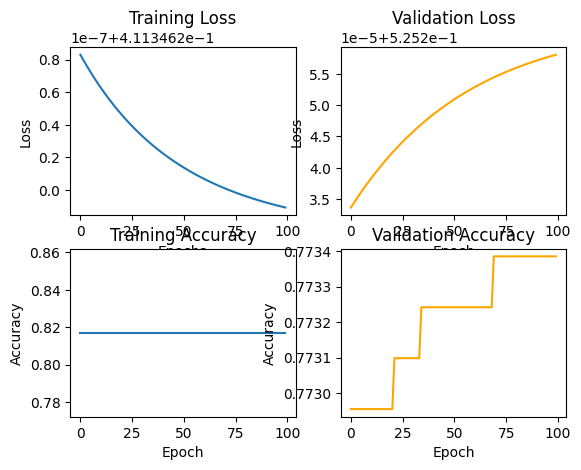

In [ ]:
#fig, ax = plt.subplots(2, 2, figsize(12,10))
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epochs', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)


print(f'Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.776536312849162
Accuracy: 0.7865168539325843


In [2]:
import numpy as np

# Câu 13
X = np.array([[22.3, -1.5, 1.1, 1]])
theta = np.array([0.1, -0.15, 0.3, -0.2])

def predict(X, theta):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

result = predict(X, theta)
print(result)

[0.92988994]


In [3]:
# Câu 14
y = np.array([1, 0, 0, 1])
y_hat = np.array([0.8, 0.75, 0.3, 0.95])

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

loss = compute_loss(y_hat, y)
print(round(loss, 3))

0.504


In [7]:
X = np.array([[1, 3], [2, 1], [3, 2], [1, 2]])
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.7, 0.4,
0.6, 0.85])

def compute_gradient(X, y_true, y_pred):
    gradient = np.dot(X.T, (y_pred - y_true)) / y_true.size
    return gradient

result = compute_gradient(X, y_true, y_pred)
print(result)


[-0.2125 -0.4   ]


In [6]:
y_true = [1, 0, 1, 1]
y_pred = [0.85, 0.35, 0.9, 0.75]

def compute_accuracy (y_true , y_pred ) :
 y_pred_rounded = np. round ( y_pred )
 accuracy = np. mean ( y_true == y_pred_rounded )

 return accuracy
print(compute_accuracy(y_true, y_pred))

1.0
